In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filenames in filenames:
        print(os.path.join(dirname, filename))

In [4]:
data = pd.read_csv('FIFA 19 complete dataset .csv', index_col=0)
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
data.drop(['Photo','Club Logo','Flag',], axis='columns', inplace=True)

In [26]:
foot = data['Preferred Foot'].value_counts().reset_index()

foot.columns = ['Preferred Foot', 'NO. of Players']

foot = foot.set_index('Preferred Foot')

foot

,NO. of Players
Preferred Foot,
Right,13948
Left,4211


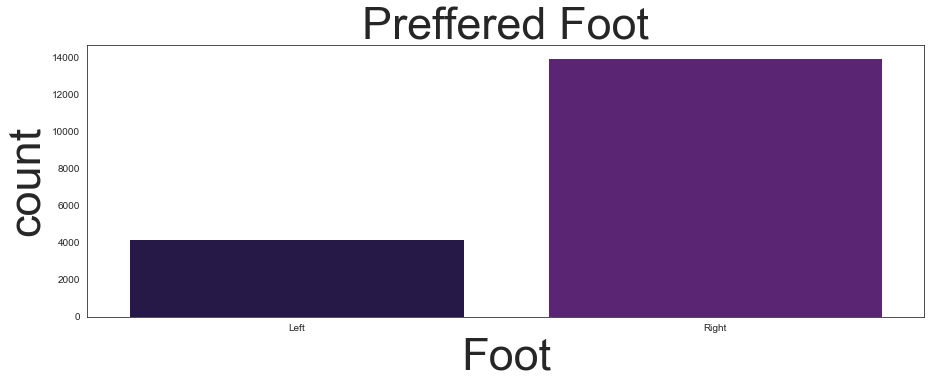

In [13]:
# Preffered Foot

sns.set_style('white')

plt.figure(figsize=(15,5))

sns.countplot(x=data['Preferred Foot'], 
              
              palette=sns.color_palette('magma'),
              
              edgecolor='white')


plt.title('Preffered Foot', size=45)

plt.xlabel('Foot', size=45)

plt.ylabel('count',size=45);

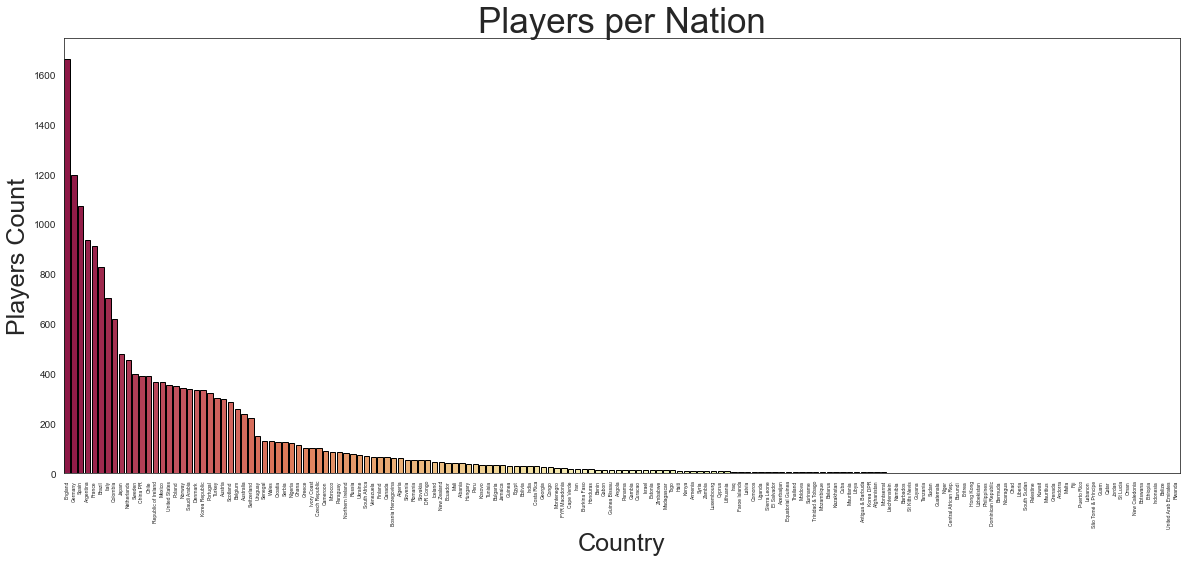

In [16]:
# Player Per Nation 

sns.set_style('white')

nation = data.Nationality.value_counts().reset_index()

nation.columns = ['Country',
                  
                  'No. of Players']

nation = nation.set_index('Country').sort_values(by='No. of Players',
                                               ascending=False)

plt.figure(figsize=(20,8))

sns.barplot(x=nation.index, 
            
            y=nation['No. of Players'], 
            
            palette='Spectral', 
            
            edgecolor='black')


plt.xticks(rotation='vertical', size=5)

plt.title('Players per Nation', size=35)

plt.xlabel('Country', size=25)

plt.ylabel('Players Count', size=25)

plt.show;


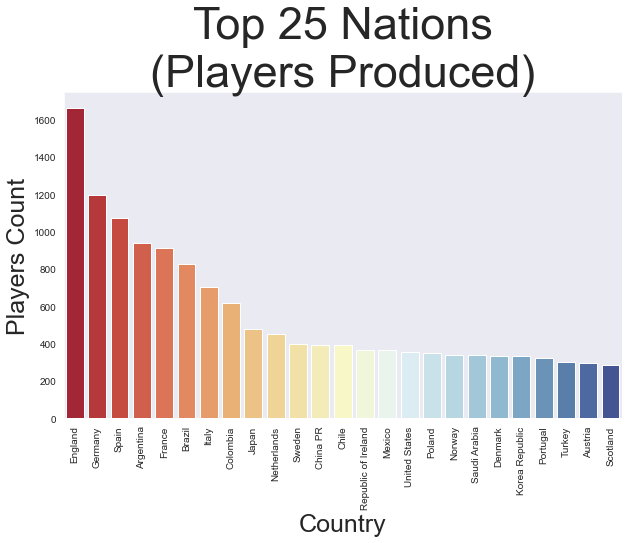

In [112]:
# Top 25 Nations (Players Produced)

sns.set_style('dark')

nation_top25 = nation.iloc[:25]

plt.figure(figsize=(10,6))

sns.barplot(x=nation_top25.index,
            
            y=nation_top25['No. of Players'], 
            
            palette='RdYlBu',
            
            edgecolor='white')



plt.xticks(rotation='vertical', size=10)

plt.title('Top 25 Nations\n(Players Produced)', size=45)

plt.xlabel('Country', size=25)

plt.ylabel('Players Count', size=25)

plt.show;


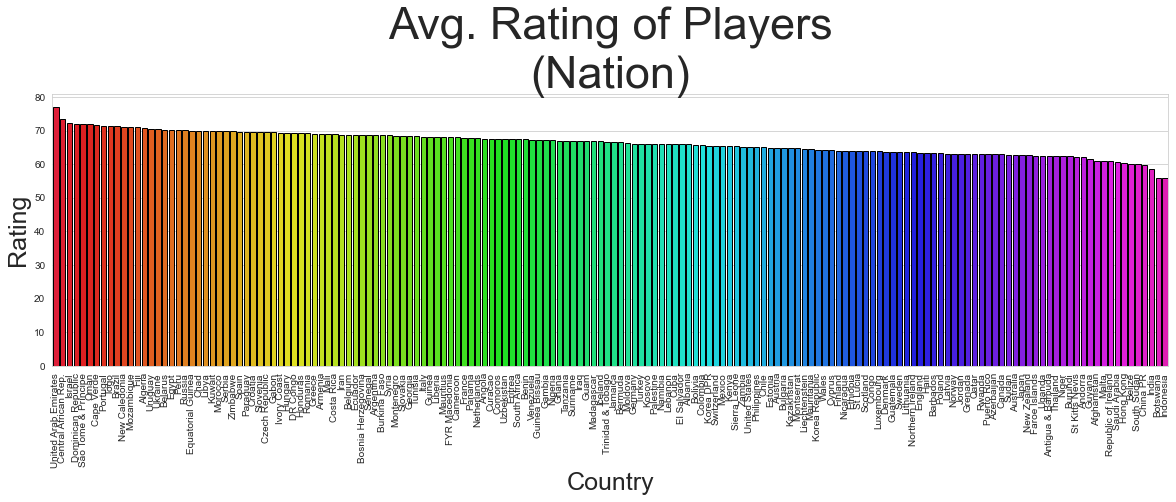

In [17]:
# Avg rating of Players

sns.set_style('whitegrid')

avg_nation = data.groupby('Nationality').Overall.mean().reset_index().sort_values(by='Overall', ascending=False)

plt.figure(figsize=(20,5))

sns.barplot(x=avg_nation['Nationality'],
           
            y=avg_nation['Overall'],
            
            palette='gist_rainbow',
            
            edgecolor='Black')


plt.xticks(rotation='vertical', size=10)

plt.title('Avg. Rating of Players\n(Nation)', size=45)

plt.xlabel('Country', size=25)

plt.ylabel('Rating', size=25)

plt.show;

In [144]:
top_20players = data.nlargest(20, ['Overall']).set_index('Nationality')

top_20players[['Name', 'Overall']].rename(columns={'Name':'Best Players'})

,Best Players,Overall
Nationality,,
Argentina,L. Messi,94
Portugal,Cristiano Ronaldo,94
Brazil,Neymar Jr,92
Spain,De Gea,91
Belgium,K. De Bruyne,91
Belgium,E. Hazard,91
Croatia,L. Modrić,91
Uruguay,L. Suárez,91
Spain,Sergio Ramos,91


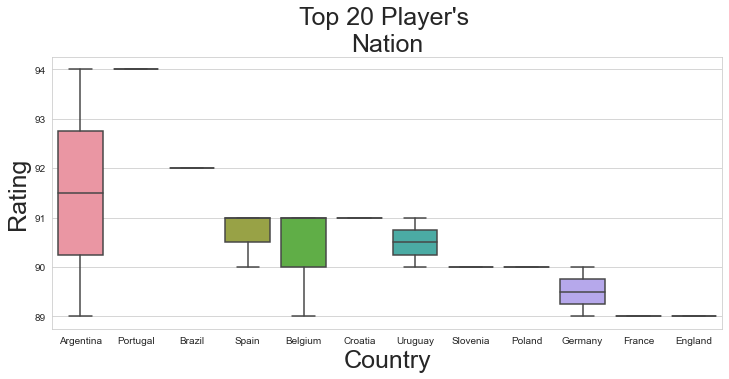

In [155]:
plt.figure(figsize=(12,5))

sns.boxplot(x=top_20players.index,
            
            y=top_20players.Overall)

plt.title("Top 20 Player's \nNation", size=25)

plt.xlabel('Country', size=25)

plt.ylabel('Rating', size=25);

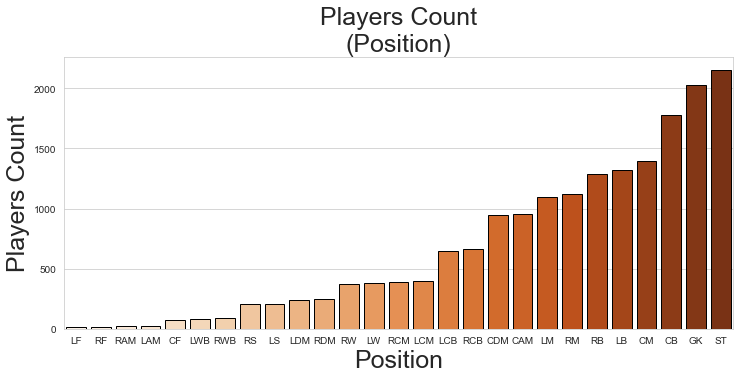

In [158]:
# Players count(position)

position = data.Position.value_counts().reset_index()

position.columns = ['Position', 
                    'Players Count']

position = position.set_index('Position').sort_values(by="Players Count", 
                                                      ascending=True)

plt.figure(figsize=(12,5))

sns.barplot(x=position.index,
            
            y=position['Players Count'], 
            
            palette = 'Oranges',
            
            edgecolor='Black')




plt.title('Players Count\n(Position)', 
          size=25)

plt.xlabel('Position', 
           size=25)

plt.ylabel("Players Count", 
           size=25);


In [164]:
def pos(row):
    if row.Position in ['LF', 'RF', 'CF','ST',
                        'LW','RW','LS',"RS"]:
        return 'Attacker'
    
    elif row.position in ['RAM','LAM','LDM','RDM','RCM',
                          'LCM','CDM','CAM','LM','RM','CM']:
        return 'Midfielder'
    
    elif row.Position in ['LWB', 'RWB','LCB','RCB',
                          'RB','LB','CB']:
        
        return 'Defender'
    
    elif row.Position in ['GK']:
    
        return 'GK'

In [170]:
def valuekm(row):
    if 'K' in row.Value:
        row.Value = row.Value.rstrip('K').lstrip('€')
        return two.Value
   
    elif 'M' in row.Value:
        if'.' in row.Value:
            row.Value = row.Value.replace('.','')
            row.Value = row.Value.replace('M','00').lstrip('€')
            
        else:
            row.Value = row.Value.replace("M", '000').lstrip('€')
            return row.Value
        
    else:
        row.Value = row.Value.lstrip('€')
        return row.Value
    

def wagekm(row):
    if 'K' in row.Wage:
        row.Wage = row.Wage.rstrip('K').lstrip('€')
        return row.Wage

    else:
        row.Wage = row.Wage.lstrip('€')
        return row.Wage
    
data.Wage = data.apply(wagekm, axis="columns")

data.Wage = data.Wage.astype('float')

data.Value = data.apply(valuekm, axis ='columns')

data.Value = data.Value.astype('float')

data['Role'] = data.apply(pos, axis ='columns')
        
        

TypeError: argument of type 'float' is not iterable

In [165]:
sns.lmplot(x='Age',
           
           y='Value', 
           
           data=data, 
           
           hue="Role", 
           
           height=8, 
           
           aspect=1.5, 
           
           legend_out=False,
          
           palette=dict(Attacker="r", 
           
                        Defender='limegreen',
                       
                        Midfilder='b',
                      
                        GK='black'))


plt.xlabel("Age", 
           size=15)

plt.ylabel('Value(in k)', 
           size=15)

plt.title('Age Vs Value(in k)\n(Role)', 
          size=25)

plt.legend(loc='upper right')

plt.show

KeyError: "['Role'] not in index"

In [171]:
expclub = data.groupby('Club').Value.mean().reset_index().sort_values(by='Value',
                                                                      ascending=False)

DataError: No numeric types to aggregate

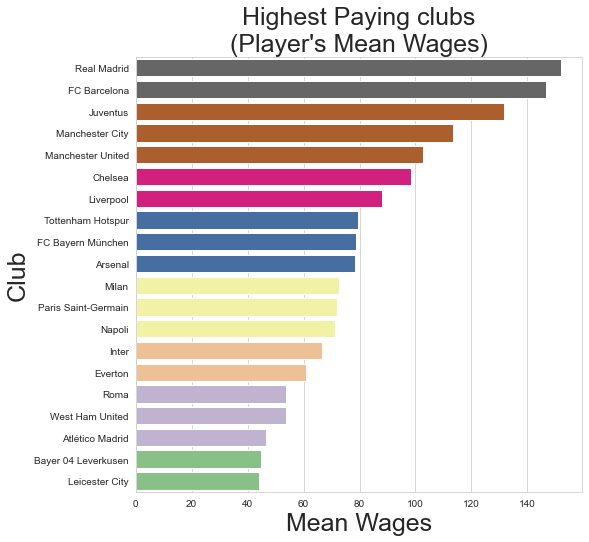

In [183]:
# Highest Paying clubs()

wageclub = data.groupby('Club').Wage.mean().reset_index().sort_values(by='Wage',
                                                                      ascending=False)

wageclub_top20 = wageclub[:20]

plt.figure(figsize=(8,8))

sns.barplot(y=wageclub_top20['Club'],
            
            x=wageclub_top20.Wage,
            
            palette='Accent_r',
            
            edgecolor='white')

plt.xlabel('Mean Wages', size=25)

plt.ylabel('Club', size=25)

plt.title('Highest Paying clubs\n(Player\'s Mean Wages)', size=25)

plt.show;

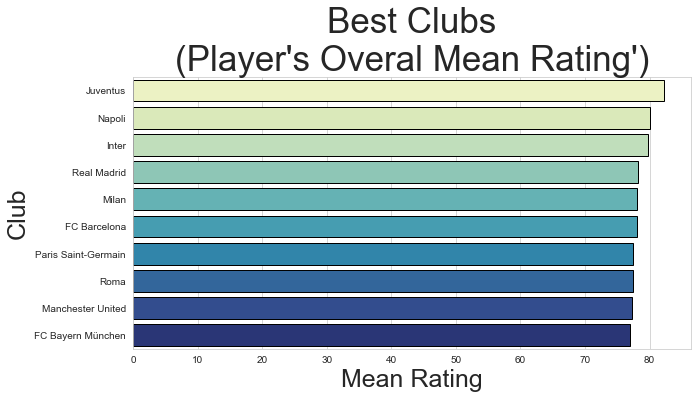

In [191]:
# Best Clubs (Player's Overall Mean Rating)

bestclub = data.groupby("Club").Overall.mean().reset_index().sort_values(by='Overall', 
                                                                        ascending=False)

bestclub_top10 = bestclub[:10]

plt.figure(figsize=(10,5))

sns.barplot(y=bestclub_top10['Club'], 
           
            x =bestclub_top10.Overall,
            
            palette='YlGnBu',
            
            edgecolor='black')

plt.ylabel('Club',size=25)

plt.xlabel('Mean Rating', size=25)

plt.title("Best Clubs\n(Player\'s Overal Mean Rating')",
          size=35)

plt.show;

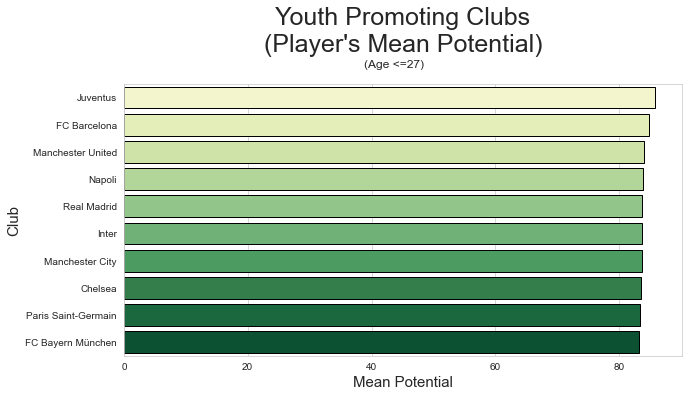

In [197]:
# Youth Promtoion Clubs (Player's Mean Potential)

youthclub = data.loc[data.Age <= 27].groupby('Club').Potential.mean().reset_index().sort_values(by='Potential', 
                                                                                                ascending=False)
youthclub_top10 = youthclub[:10]

plt.figure(figsize=(10,5))

sns.barplot(y=youthclub_top10['Club'],
            
            x=youthclub_top10.Potential, 
            
            palette='YlGn',
            
            edgecolor='black')

plt.ylabel('Club', size=15)

plt.xlabel('Mean Potential', size=15)

plt.title('Youth Promoting Clubs\n(Player\'s Mean Potential)\n', size=25)

plt.suptitle('\n(Age <=27)')

plt.show;
